In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

# Use seaborn's own theme settings instead of matplotlib's style
sns.set_theme()

# Your plotting code


In [2]:
df_bank = pd.read_csv("deposit term dirty null.csv")
df_bank.head()

,Id,BankId,Year,first_name,last_name,email,age,job,marital,education,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,8267790704,2023,Paul,Casey,paul.casey.1@gslingacademy.com,999.0,management,married,tertiary,...,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,1002,6712420122,2023,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,44.0,technician,single,secondary,...,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,1003,7184524312,2023,Tina,Andrews,tina.andrews.3@gslingacademy.com,33.0,entrepreneur,married,secondary,...,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,1004,2955004551,2023,Tara,Clark,tara.clark.4@gslingacademy.com,47.0,blue-collar,married,unknown,...,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,1005,9657974076,2023,Anthony,Campos,anthony.campos.5@gslingacademy.com,33.0,unknown,single,unknown,...,no,unknown,5,may,198,1,-1.0,0,unknown,no


In [14]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          45211 non-null  int64  
 1   BankId      45211 non-null  int64  
 2   Year        45211 non-null  int64  
 3   first_name  45211 non-null  object 
 4   last_name   45211 non-null  object 
 5   email       45195 non-null  object 
 6   age         45201 non-null  float64
 7   job         45203 non-null  object 
 8   marital     45211 non-null  object 
 9   education   45211 non-null  object 
 10  default     45206 non-null  object 
 11  balance     45208 non-null  float64
 12  housing     45204 non-null  object 
 13  loan        45211 non-null  object 
 14  contact     45198 non-null  object 
 15  day         45211 non-null  int64  
 16  month       45210 non-null  object 
 17  duration    45211 non-null  int64  
 18  campaign    45211 non-null  int64  
 19  pdays       45207 non-nul

In [15]:
df_bank.shape

(45211, 23)

In [ ]:
df_bank.describe()

,Id,BankId,Year,age,balance,day,campaign,pdays,previous
count,45211.000000,4.521100e+04,45211.0,45201.000000,45208.000000,45211.000000,45211.000000,45207.000000,45211.000000
mean,23606.000000,4.989131e+09,2023.0,40.954802,1362.346620,15.806419,2.763841,40.201473,0.580323
std,13051.435847,2.892306e+09,0.0,11.539256,3044.852387,8.322476,3.098021,100.132426,2.303441
min,1001.000000,5.691900e+04,2023.0,-1.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,12303.500000,2.473409e+09,2023.0,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,23606.000000,4.972121e+09,2023.0,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,34908.500000,7.512281e+09,2023.0,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,46211.000000,9.999937e+09,2023.0,999.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [16]:
# Count the occurrences of unique values in the 'y' column
y_counts = df_bank['y'].value_counts()

# Display the counts
print(y_counts)

y
no     39922
yes     5289
Name: count, dtype: int64


In [17]:

df_bank = df_bank.drop(['Id', 'BankId', 'Year', 'first_name', 'last_name', 'email'], axis=1, errors='ignore')
df_bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,NaN,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1.0,0,unknown,no


In [18]:
# To check duplicated values
print(df_bank.duplicated().value_counts())
print(df_bank.duplicated().sum())

False    45211
Name: count, dtype: int64
0


In [19]:
# Remove duplicated rows
df_bank_cleaned = df_bank.drop_duplicates()

# Verify if duplicates are removed
print(df_bank_cleaned.duplicated().sum())  # This should return 0 if all duplicates are removed


0


In [20]:
# We need to check missing values in dataset
df_bank.isnull().sum()

age          10
job           8
marital       0
education     0
default       5
balance       3
housing       7
loan          0
contact      13
day           0
month         1
duration      0
campaign      0
pdays         4
previous      0
poutcome      0
y             0
dtype: int64

In [21]:
df_bank.dropna(subset=['housing', 'default',  'month', 'contact', 'job'], inplace=True)

In [22]:
unique_duration = df_bank['duration'].unique()
print("Unique values in 'duration' column:", unique_duration)

Unique values in 'duration' column: [ 261  151   92 ... 1298 1246 1556]


In [23]:
df_bank['duration'] = pd.to_numeric(df_bank['duration'], errors='coerce')
print(df_bank)

         age           job   marital  education default  balance housing loan  \
0      999.0    management   married   tertiary      no   2143.0     yes   no   
1       44.0    technician    single  secondary      no     29.0     yes   no   
3       47.0   blue-collar   married    unknown      no   1506.0     yes   no   
4       33.0       unknown    single    unknown      no      1.0      no   no   
10      41.0        admin.  divorced  secondary      no    270.0     yes   no   
...      ...           ...       ...        ...     ...      ...     ...  ...   
45206   51.0    technician   married   tertiary      no    825.0      no   no   
45207   71.0       retired  divorced    primary      no   1729.0      no   no   
45208   72.0       retired   married  secondary      no   5715.0      no   no   
45209   57.0   blue-collar   married  secondary      no    668.0      no   no   
45210   37.0  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month

In [24]:
df_bank['age'] = df_bank['age'].fillna(df_bank['age'].mean())    # Filing the null values with median
df_bank['balance'] = df_bank['balance'].fillna(df_bank['balance'].mean()) # Filing the null values with median
df_bank['duration'] = df_bank['duration'].fillna(df_bank['duration'].mean()) # Filing the null values with median
df_bank['pdays'] = df_bank['pdays'].fillna(df_bank['pdays'].mean()) # Filing the null values with median



In [25]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
# List of columns to check
columns_to_check = ['age', 'job','marital',	'education','default','balance','housing','loan','contact',	'day','month', 'duration','campaign','pdays','previous',
                    'poutcome']

# Loop through each column and apply type checking
for column in columns_to_check:
    print(f"Data types in column '{column}':")
    print(df_bank[column].apply(type).value_counts())
    print("-" * 40)  # Separator for better readability


Data types in column 'age':
age
<class 'float'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'job':
job
<class 'str'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'marital':
marital
<class 'str'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'education':
education
<class 'str'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'default':
default
<class 'str'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'balance':
balance
<class 'float'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'housing':
housing
<class 'str'>    45178
Name: count, dtype: int64
----------------------------------------
Data types in column 'loan':
loan
<class 'str'>    45178
Name: count, dtype: int64
---------------

In [27]:
# Round and then convert column 'A' from float to int
df_bank['age'] = df_bank['age'].round().astype(int)
df_bank['pdays'] = df_bank['pdays'].round().astype(int)

In [28]:
df_bank.shape

(45178, 17)

In [29]:
# Select only numeric columns
numeric_cols = df_bank.select_dtypes(include=[np.number]).columns

# Loop through the numeric columns and check for negative values
for col in numeric_cols:
    negative_values = df_bank[df_bank[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column {col}:")
        print(negative_values[[col]], "\n")


Negative values found in column age:
       age
45203   -1
45204   -1
45205   -1 

Negative values found in column balance:
       balance
25      -372.0
28      -246.0
36        -7.0
37        -3.0
45      -171.0
...        ...
44626   -205.0
44629    -46.0
44836   -195.0
44908   -130.0
44964    -42.0

[3765 rows x 1 columns] 

Negative values found in column pdays:
       pdays
0         -1
1         -1
3         -1
4         -1
10        -1
...      ...
45203     -1
45205     -1
45206     -1
45207     -1
45209     -1

[36919 rows x 1 columns] 



In [30]:
mean_balance = df_bank[df_bank['balance'] >= 0]['balance'].mean()
df_bank['balance'] = df_bank['balance'].apply(lambda x: mean_balance if x < 0 else x)


In [31]:
#checking for outliers in categorical variables
# Check unique values for each categorical column
for job in df_bank.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {job}:")
    print(df_bank[job].unique(), "\n")


Unique values in job:
['management' 'technician' 'blue-collar' 'unknown' 'admin.' 'retired'
 'services' 'entrepreneur' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

Unique values in marital:
['married' 'single' 'divorced'] 

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary'] 

Unique values in default:
['no' 'yes'] 

Unique values in housing:
['yes' 'no'] 

Unique values in loan:
['no' 'yes'] 

Unique values in contact:
['unknown' 'cellular' 'telephone'] 

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

Unique values in poutcome:
['unknown' 'failure' 'other' 'success'] 

Unique values in y:
['no' 'yes'] 



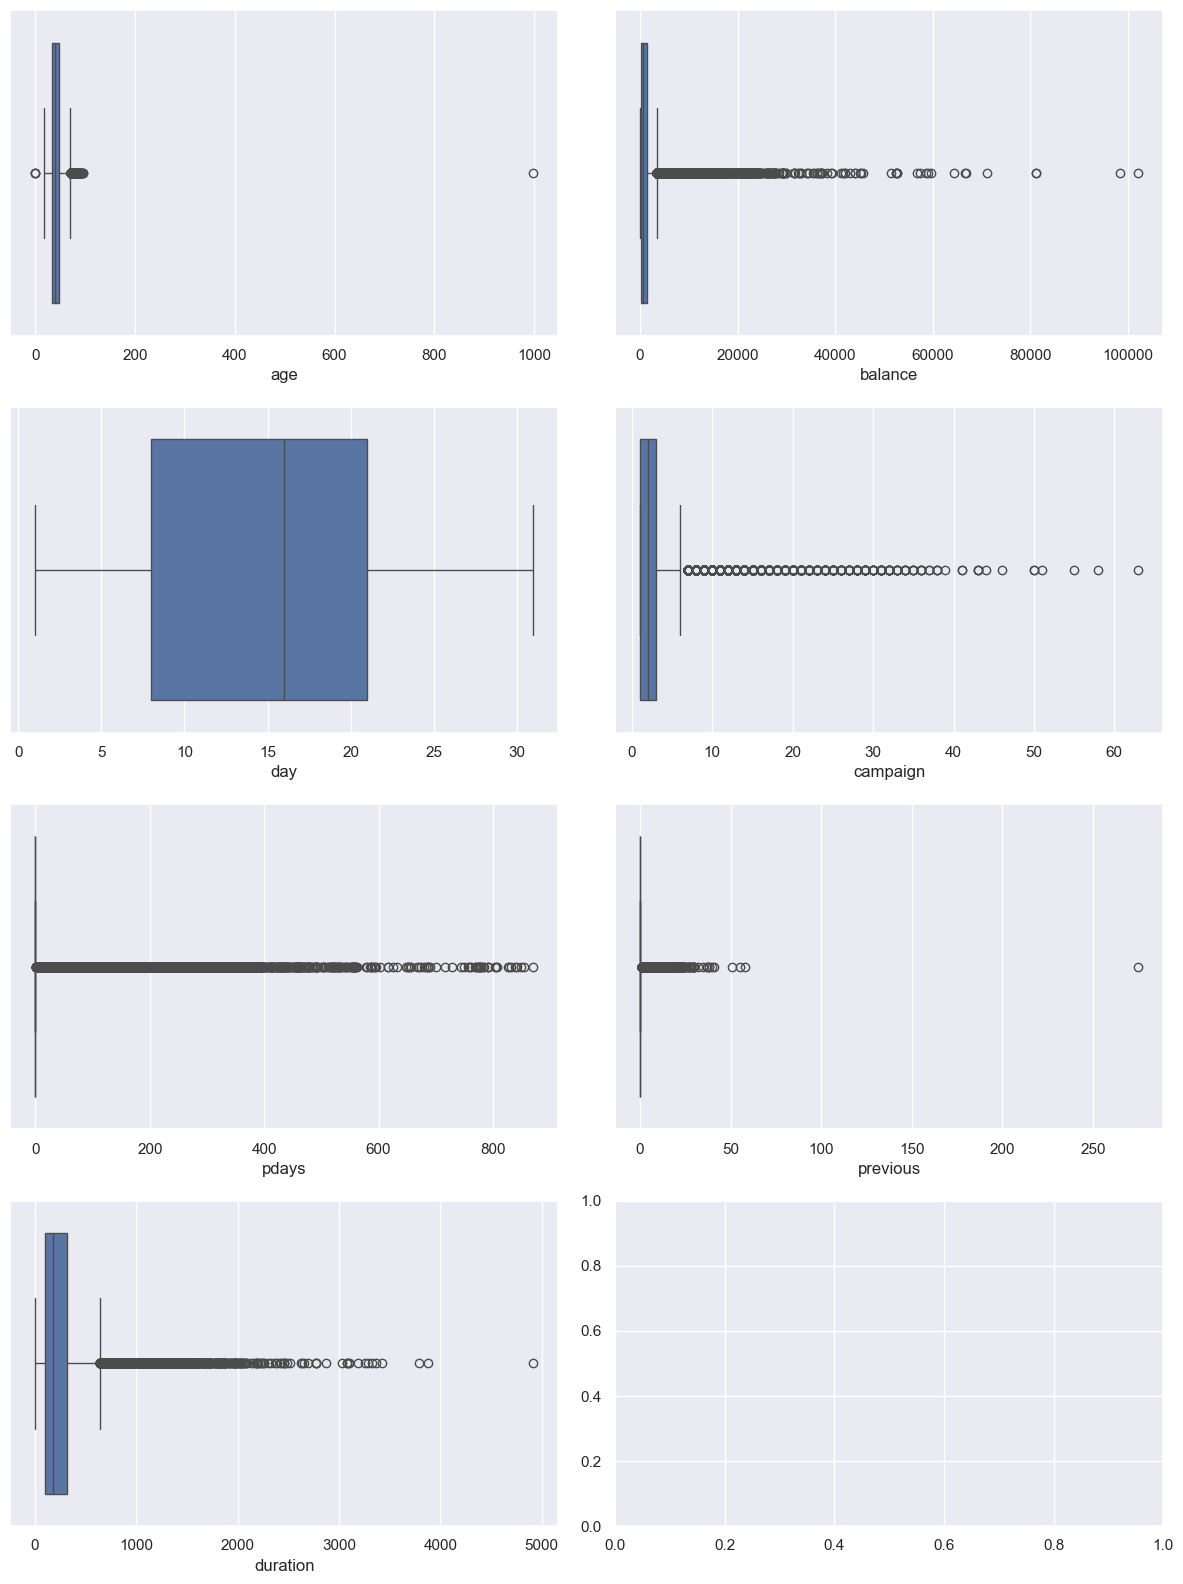

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  # Adjust to [2, 1] for third row, second column



# Adjust layout
plt.tight_layout()
plt.show()


In [33]:
def cap_outliers(df_bank, column):
    Q1 = df_bank[column].quantile(0.25)
    Q3 = df_bank[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_bank[column] = df_bank[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df_bank

# Example usage
df_bank = cap_outliers(df_bank, 'age')
df_bank = cap_outliers(df_bank, 'balance')
df_bank = cap_outliers(df_bank, 'day')
df_bank = cap_outliers(df_bank, 'campaign')
df_bank = cap_outliers(df_bank, 'duration')
df_bank = cap_outliers(df_bank, 'pdays')
df_bank = cap_outliers(df_bank, 'previous')
# Repeat for other columns as needed


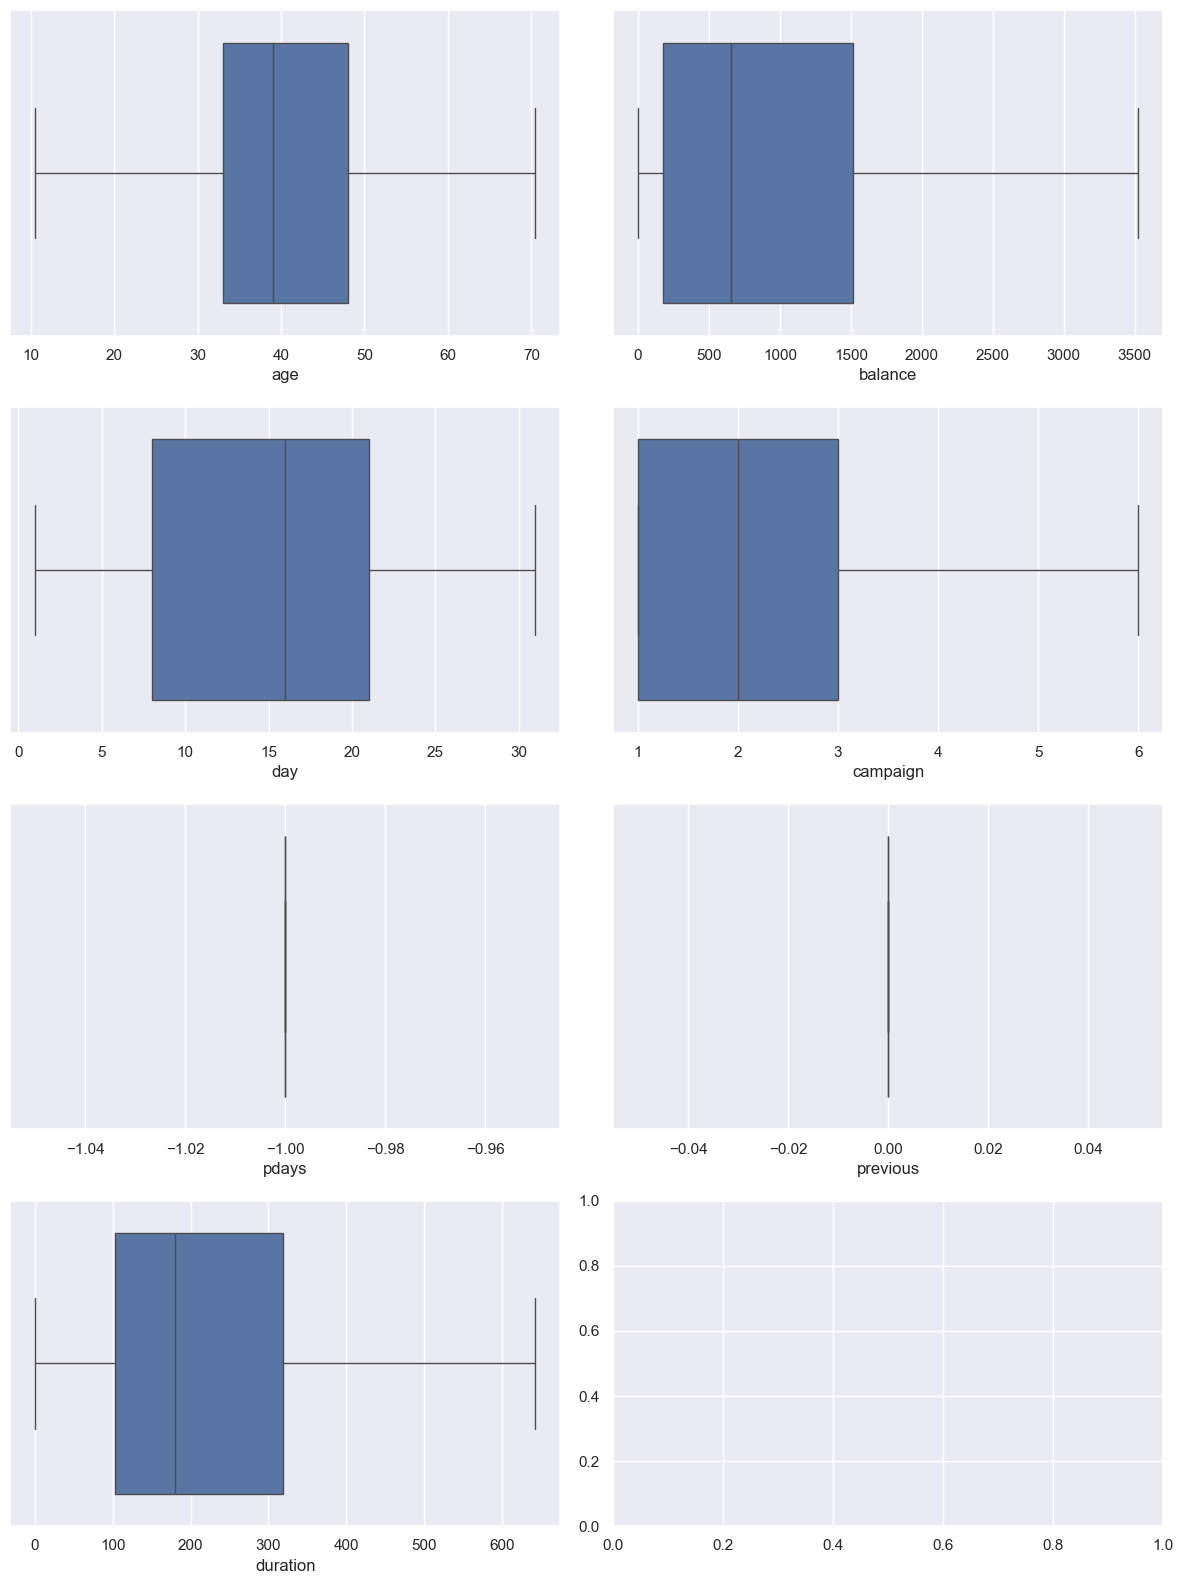

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # 4 rows, 2 columns


# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.boxplot(data=df_bank, x='pdays', ax=axes[2, 0])
sns.boxplot(data=df_bank, x='previous', ax=axes[2, 1])
sns.boxplot(data=df_bank, x='duration', ax=axes[3, 0])  # Adjust to [2, 1] for third row, second column



# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
# after applying the outlier capping,
# it show 0 for previous column and -1 for pdays coloum
#it means these columns no longer have much variation, and they could potentially be uninformative for your model or analysis.

In [36]:
df_bank = df_bank.drop(['pdays','previous'], axis=1)
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,70.5,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222.0,1.0,unknown,no


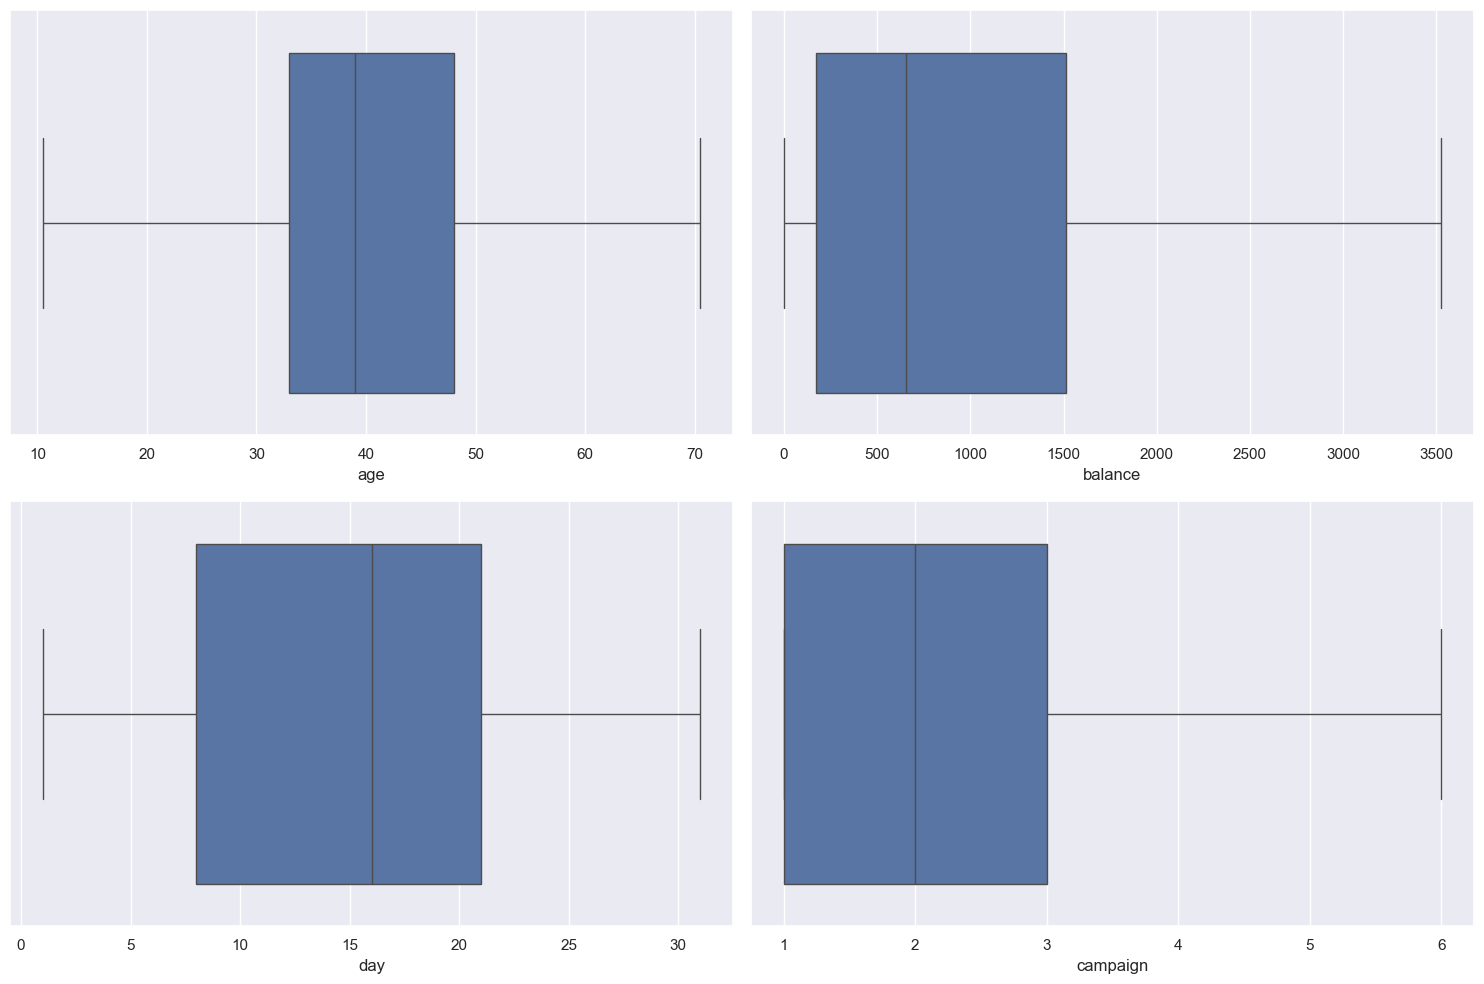

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plotting region (3 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create boxplot in each subplot
sns.boxplot(data=df_bank, x='age', ax=axes[0, 0])
sns.boxplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.boxplot(data=df_bank, x='day', ax=axes[1, 0])
sns.boxplot(data=df_bank, x='campaign', ax=axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [38]:
df_bank.describe()

,age,balance,day,duration,campaign
count,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000
mean,40.869383,1092.442567,15.809199,234.974235,2.392492
std,10.396896,1132.743901,8.319956,176.762149,1.600147
min,10.500000,0.000000,1.000000,0.000000,1.000000
25%,33.000000,175.000000,8.000000,103.000000,1.000000
50%,39.000000,654.000000,16.000000,180.000000,2.000000
75%,48.000000,1514.990921,21.000000,319.000000,3.000000
max,70.500000,3524.977302,31.000000,643.000000,6.000000


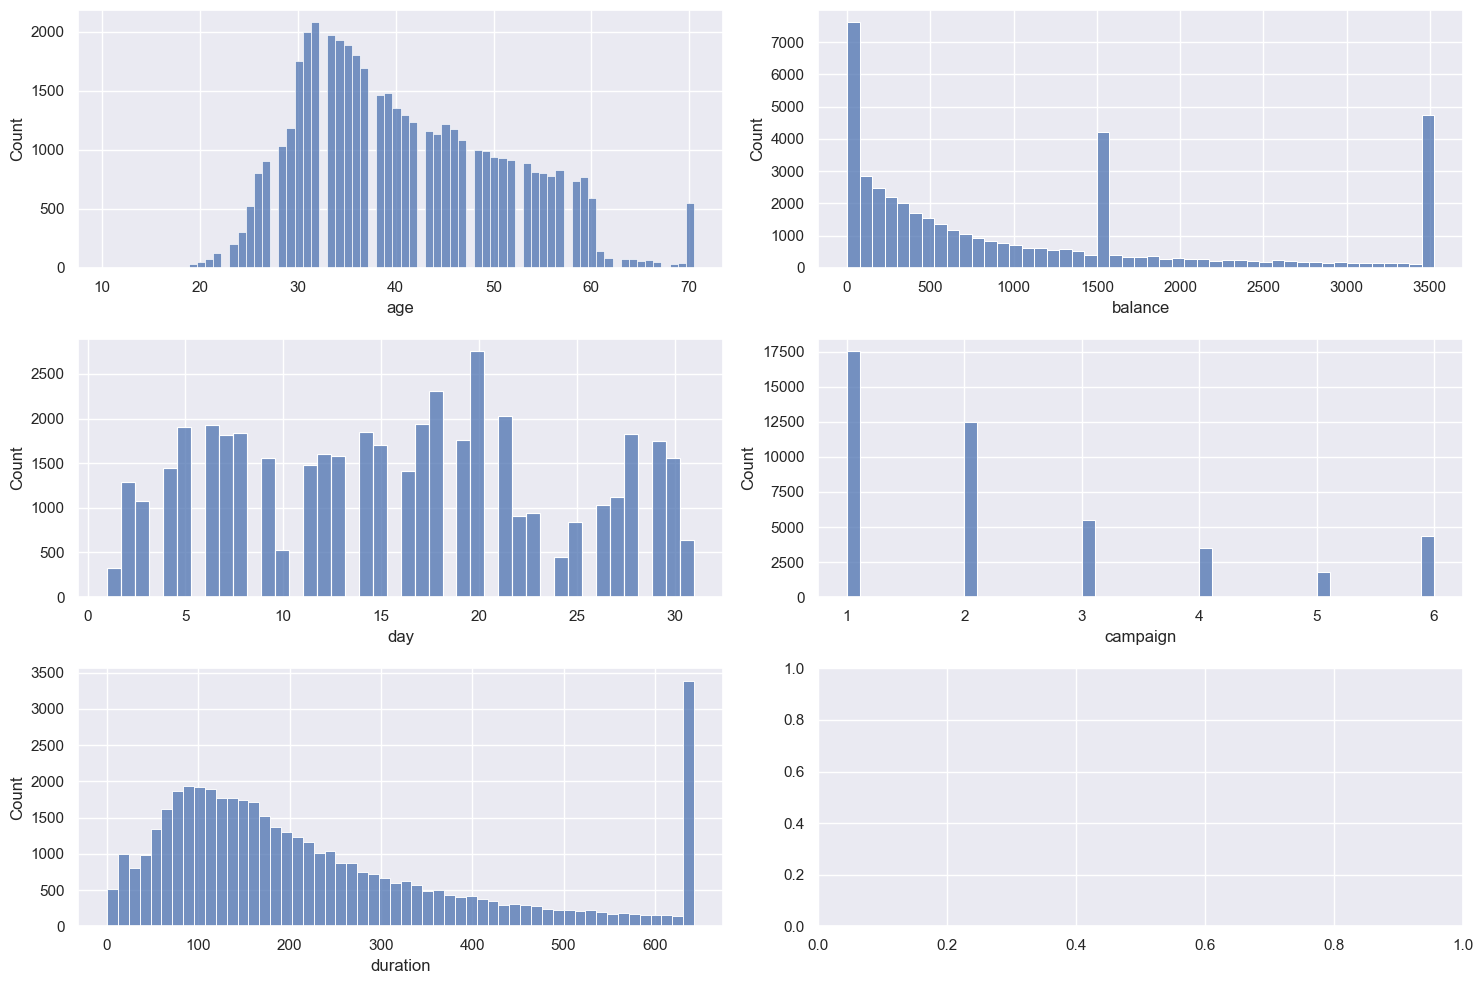

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 3 columns
sns.histplot(data=df_bank, x='age', ax=axes[0, 0])
sns.histplot(data=df_bank, x='balance', ax=axes[0, 1])
sns.histplot(data=df_bank, x='day', ax=axes[1, 0])
sns.histplot(data=df_bank, x='campaign', ax=axes[1, 1])
sns.histplot(data=df_bank, x='duration', ax=axes[2,0])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


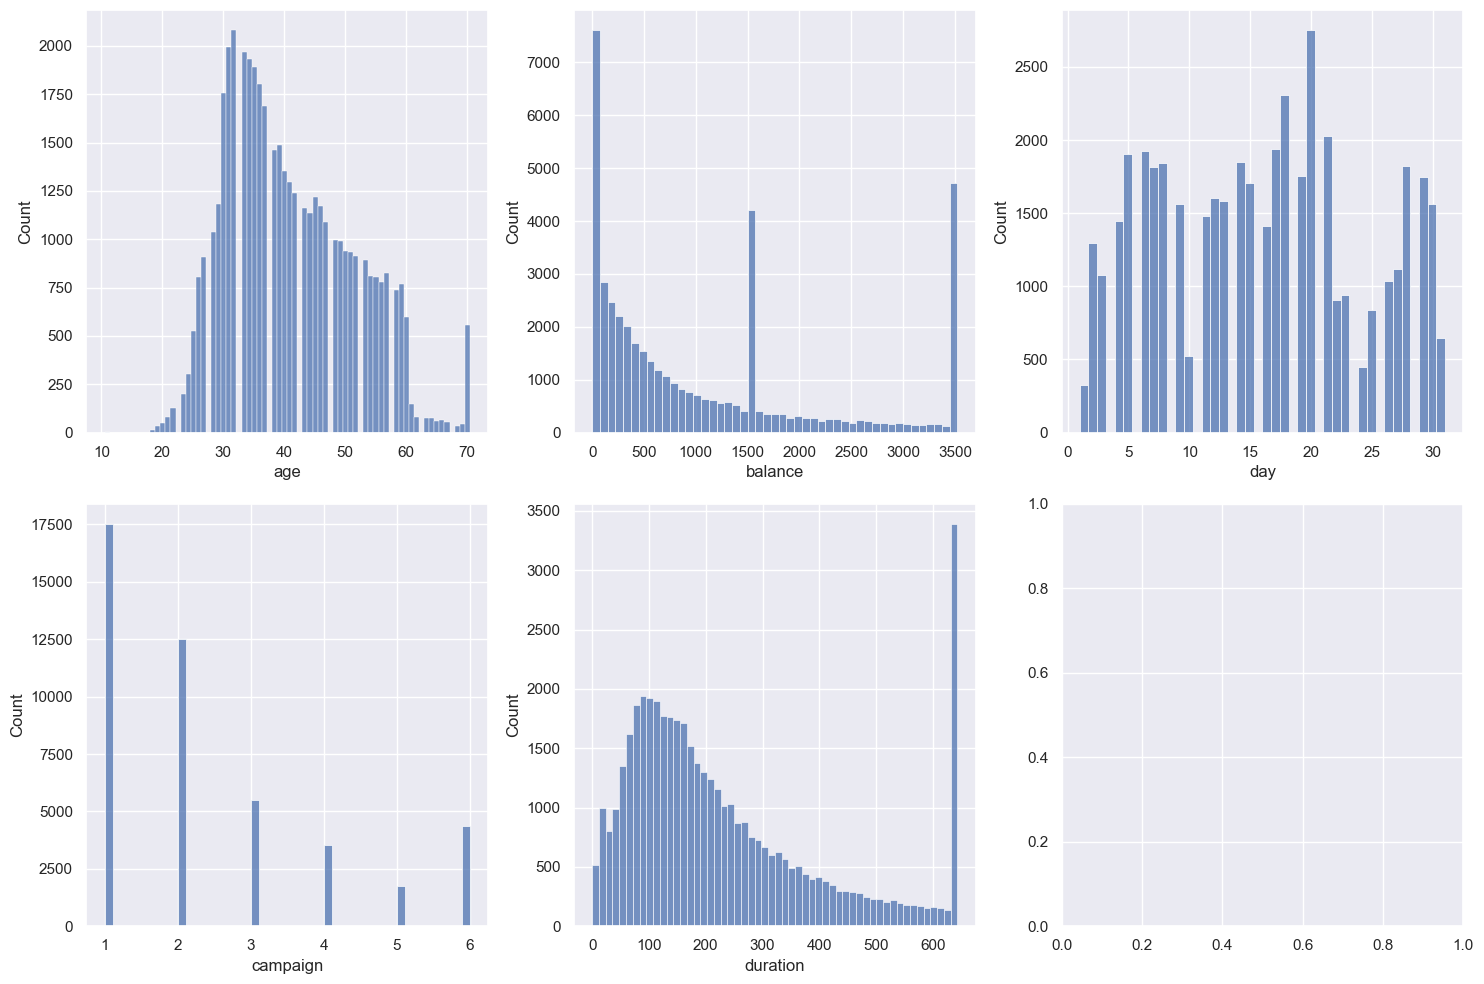

In [40]:
from pylab import *
import seaborn as sns
import numpy as np

# Set figure size and random seed
sns.set(rc={"figure.figsize": (15, 10)})
np.random.seed(0)

# Create a 2x3 grid for 6 subplots
fig, axes = plt.subplots(2, 3)  # 2 rows, 3 columns

# Plotting in an organized manner
sns.histplot(df_bank['age'], ax=axes[0, 0])        # Top-left
sns.histplot(df_bank['balance'], ax=axes[0, 1])    # Top-middle
sns.histplot(df_bank['day'], ax=axes[0, 2])        # Top-right
sns.histplot(df_bank['campaign'], ax=axes[1, 0])   # Bottom-left
sns.histplot(df_bank['duration'], ax=axes[1, 1])   # Bottom-middle


# Adjust layout
plt.tight_layout()
plt.show()


y
no     39889
yes     5289
Name: count, dtype: int64


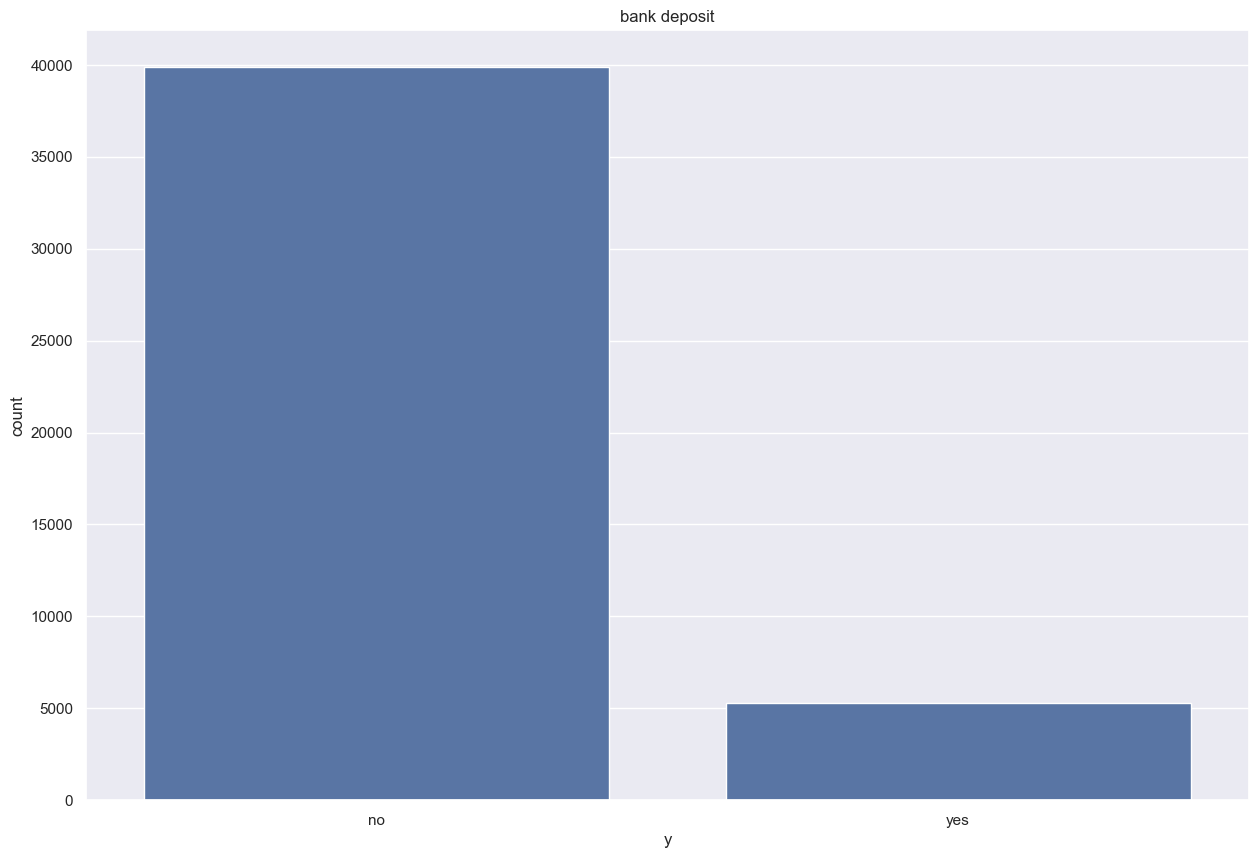

In [41]:
print(df_bank.y.value_counts())
axes1 = sns.countplot(x='y', data = df_bank)
#giving title to the plot
plt.title('bank deposit');

In [42]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [43]:
df_bank['age'] = df_bank['age'].round().astype(int)
df_bank['campaign'] = df_bank['campaign'].round().astype(int)

In [44]:
df_bank.dtypes

age            int32
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int32
poutcome      object
y             object
dtype: object

In [45]:
df_bank.isnull().sum()
df_bank.shape

(45178, 15)

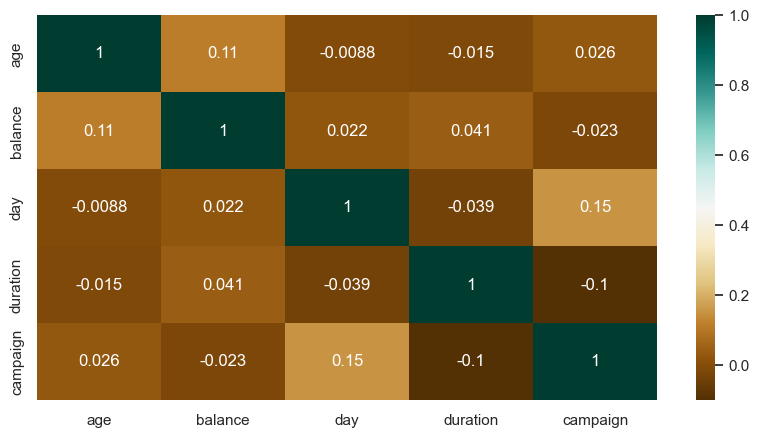

In [84]:
# Filter only numeric columns for the correlation matrix
numeric_df_bank = df_bank.select_dtypes(include=['float64', 'int64','int32'])

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(10,5))
c = numeric_df_bank.corr()  # Correlation of numeric columns only
sns.heatmap(c, cmap="BrBG", annot=True)

plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek

In [48]:
# 1. Data preparation
# Assuming your dataset is already loaded in df_bank
# Feature-target split
X = df_bank.drop('y', axis=1)  # Features
y = df_bank['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [49]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Data Standardization and Label Encoding
def preprocess_data(X, categorical_features, numerical_features):
    # Label encoding for categorical features and scaling numerical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),  # Scaling for numerical features
            ('cat', OrdinalEncoder(), categorical_features)  # Label encoding for categorical features
        ]
    )
    return preprocessor


In [50]:
# Automatically identify categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64','int32', 'float64']]

# Apply preprocessing
preprocessor = preprocess_data(X, categorical_features, numerical_features)

# Transform the data (X_train and X_test)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 4. Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_preprocessed, y_test)

In [51]:
print("after the Apply SMOTE  shape of the train, test dataset")
print(X_train_resampled.shape)
print(X_test_resampled.shape)

print(X_train.shape)
print(X_test.shape)


after the Apply SMOTE  shape of the train, test dataset
(63822, 14)
(15956, 14)
(36142, 14)
(9036, 14)


y
0    31911
1    31911
Name: count, dtype: int64


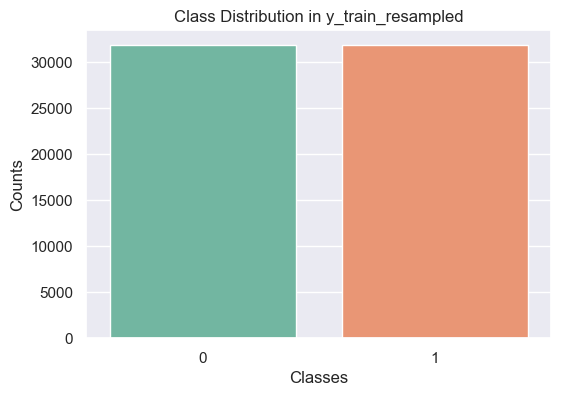

In [47]:
# Check the class distribution in y_train_resampled
y_train_resampled_counts = pd.Series(y_train_resampled).value_counts()

print(y_train_resampled_counts)

class_counts_df = pd.DataFrame({'Class': y_train_resampled_counts.index, 'Count': y_train_resampled_counts.values})

# Visualize with Seaborn barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='Set2')

plt.title('Class Distribution in y_train_resampled')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [79]:
no_prediction = df_bank[df_bank['y'] == 'no']
print(no_prediction)

       age           job   marital  education default  balance housing loan  \
0       70    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
10      41        admin.  divorced  secondary      no    270.0     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45189   25      services    single  secondary      no    199.0      no   no   
45194   59    management   married   tertiary      no    138.0     yes  yes   
45199   34   blue-collar    single  secondary      no   1475.0     yes   no   
45209   57   blue-collar   married  secondary      no    668.0      no   no   
45210   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign pou

In [60]:
print(X_test, y_test)

       age          job   marital  education default      balance housing  \
31259   25   unemployed    single  secondary      no   771.000000      no   
43802   39   unemployed  divorced  secondary      no   265.000000     yes   
30251   48  blue-collar   married  secondary      no   194.000000     yes   
34056   56   management   married   tertiary      no   746.000000      no   
35999   33  blue-collar   married    primary      no   139.000000     yes   
...    ...          ...       ...        ...     ...          ...     ...   
37788   32  blue-collar    single  secondary      no   811.000000     yes   
8546    45  blue-collar   married    primary      no   147.000000     yes   
39817   48   management   married   tertiary      no  3524.977302      no   
21181   34   technician   married  secondary      no   883.000000      no   
16419   32  blue-collar    single  secondary      no     0.000000      no   

      loan   contact  day month  duration  campaign poutcome  
31259   no  

In [66]:
yes_prediction = df_bank[df_bank['y'] == 'yes']
print(yes_prediction)

       age         job   marital  education default      balance housing loan  \
83      59      admin.   married  secondary      no  2343.000000     yes   no   
86      56      admin.   married  secondary      no    45.000000      no   no   
87      41  technician   married  secondary      no  1270.000000     yes   no   
129     55    services   married  secondary      no  2476.000000     yes   no   
168     54      admin.   married   tertiary      no   184.000000      no   no   
...    ...         ...       ...        ...     ...          ...     ...  ...   
45204   10     retired   married  secondary      no  2850.000000      no   no   
45205   10  technician    single  secondary      no   505.000000      no  yes   
45206   51  technician   married   tertiary      no   825.000000      no   no   
45207   70     retired  divorced    primary      no  1729.000000      no   no   
45208   70     retired   married  secondary      no  3524.977302      no   no   

        contact  day month 

In [49]:
print(X_test_resampled, y_test_resampled)

[[-1.52421077 -0.28530363 -1.29909556 ...  0.          7.
   3.        ]
 [-0.17628185 -0.73198906  1.34209879 ...  2.          8.
   1.        ]
 [ 0.69024389 -0.79466627 -1.29909556 ...  0.          3.
   3.        ]
 ...
 [ 1.27705233 -0.76101682  1.45227339 ...  0.          4.
   3.        ]
 [-0.89352282  0.89475743  0.72174933 ...  0.          7.38327589
   1.        ]
 [ 1.73792845  1.0889522  -1.28815868 ...  2.          8.
   3.        ]] 0        0
1        1
2        0
3        0
4        0
        ..
15951    1
15952    1
15953    1
15954    1
15955    1
Name: y, Length: 15956, dtype: int64


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7978
           1       0.90      0.82      0.86      7978

    accuracy                           0.87     15956
   macro avg       0.87      0.87      0.87     15956
weighted avg       0.87      0.87      0.87     15956

Confusion Matrix:
 [[7249  729]
 [1400 6578]]
Train Accuracy: 1.0
Test Accuracy: 0.8665705690649286
Precision: 0.9002326536198166
Recall: 0.8245174229130108
F1 Score: 0.8607131174353941
Confusion Matrix: [[7249  729]
 [1400 6578]]
Cohen's Kappa Score: 0.7331411381298572


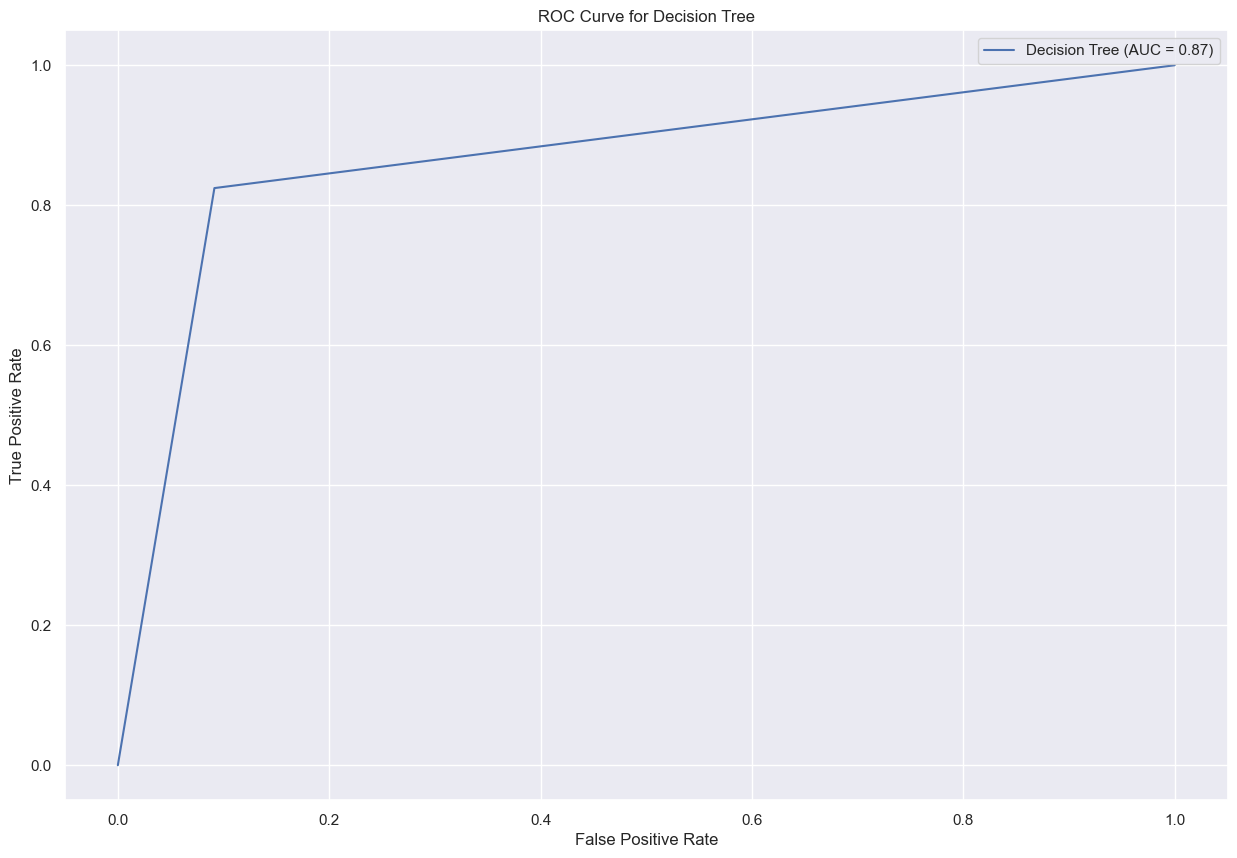

In [52]:
from sklearn.metrics import cohen_kappa_score
# 5. Model Training and Evaluation
def evaluate_decision_tree(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report
    print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")


    return metrics

# 6. Define a function to plot ROC curve for Decision Tree
def plot_roc_curve_decision_tree(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Tree')
    plt.legend()
    plt.show()

# 7. Initialize Decision Tree Classifier and evaluate
decision_tree = DecisionTreeClassifier(random_state=42)
metrics = evaluate_decision_tree(decision_tree, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 8. Plot the ROC curve
plot_roc_curve_decision_tree(decision_tree, X_test_resampled, y_test_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7}


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7978
           1       0.94      0.90      0.92      7978

    accuracy                           0.92     15956
   macro avg       0.92      0.92      0.92     15956
weighted avg       0.92      0.92      0.92     15956

Confusion Matrix:
 [[7508  470]
 [ 837 7141]]
Train Accuracy: 1.0
Test Accuracy: 0.9180872399097518
Precision: 0.9382472736828275
Recall: 0.8950864878415643
F1 Score: 0.9161588299441914
Confusion Matrix: [[7508  470]
 [ 837 7141]]
Cohen's Kappa Score: 0.8361744798195037


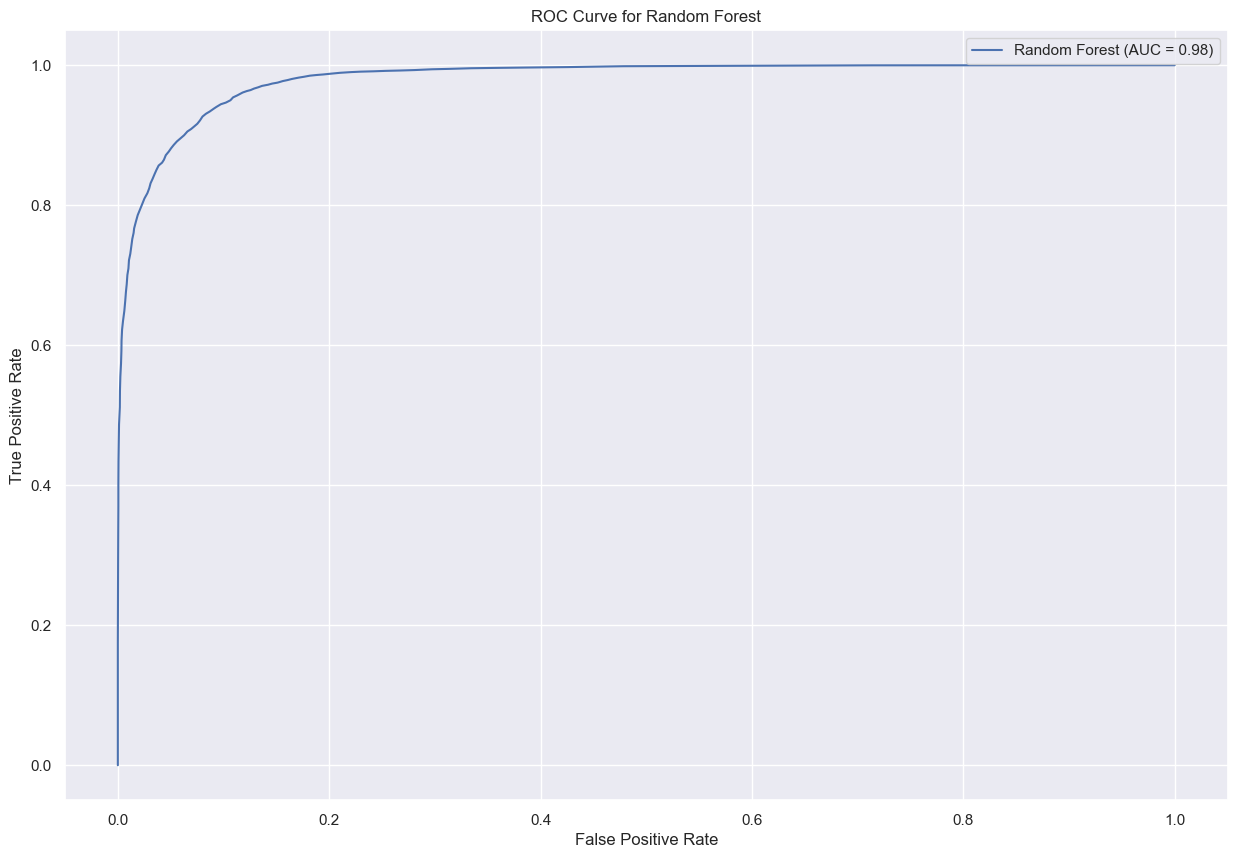

In [67]:
from sklearn.ensemble import RandomForestClassifier

# 5. Model Training and Evaluation
def evaluate_random_forest(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report
    print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 6. Define a function to plot ROC curve for Random Forest
def plot_roc_curve_random_forest(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend()
    plt.show()

# 7. Initialize RandomForestClassifier and evaluate
random_forest = RandomForestClassifier(random_state=42)
metrics = evaluate_random_forest(random_forest, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 8. Plot the ROC curve
plot_roc_curve_random_forest(random_forest, X_test_resampled, y_test_resampled)

KNeighborsClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      7978
           1       0.83      0.76      0.79      7978

    accuracy                           0.80     15956
   macro avg       0.81      0.80      0.80     15956
weighted avg       0.81      0.80      0.80     15956

Confusion Matrix:
 [[6729 1249]
 [1891 6087]]
Train Accuracy: 0.9406317570743631
Test Accuracy: 0.8032088242667336
Precision: 0.8297437295528899
Recall: 0.7629731762346452
F1 Score: 0.794958861172783
Confusion Matrix: [[6729 1249]
 [1891 6087]]
Cohen's Kappa Score: 0.606417648533467


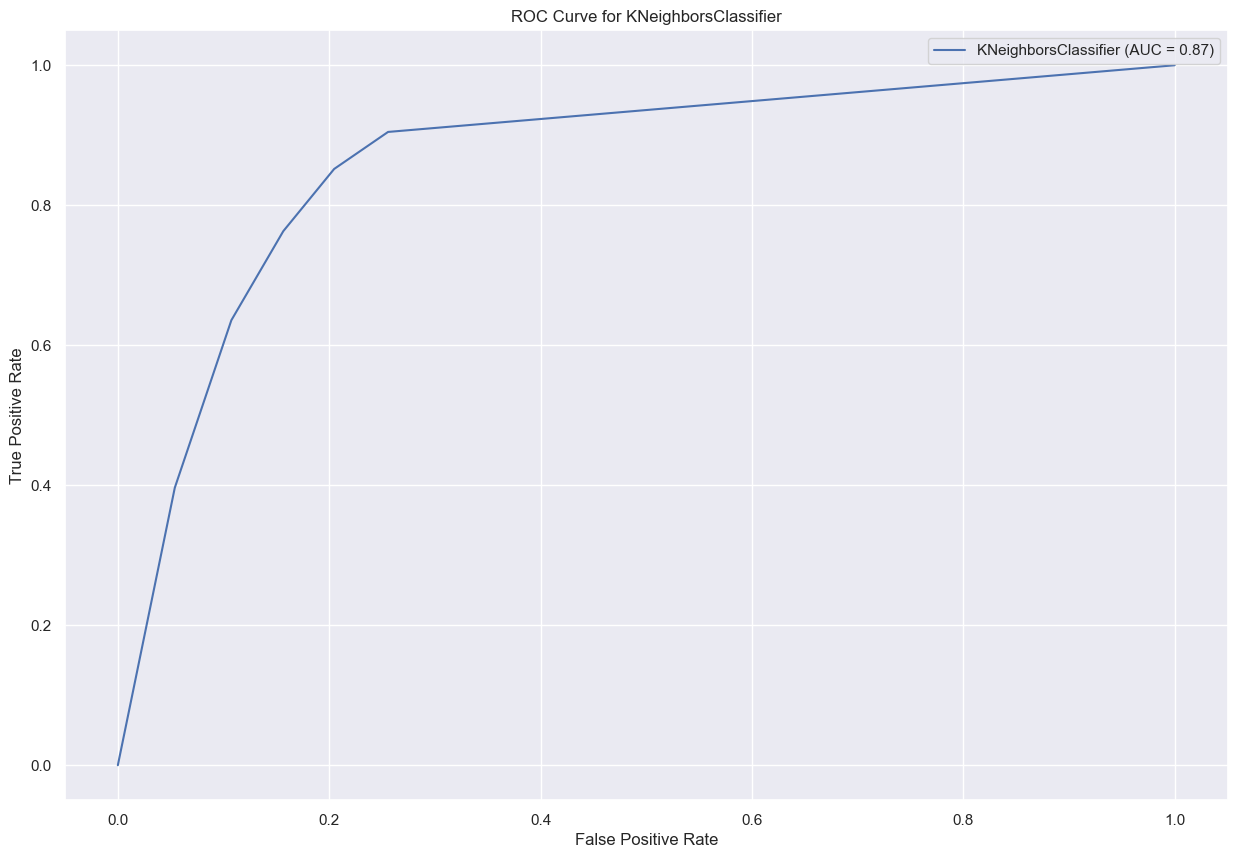

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# 5. Model Training and Evaluation
def evaluate_knn(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report
    print("KNeighborsClassifier Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 6. Define a function to plot ROC curve for KNeighborsClassifier
def plot_roc_curve_knn(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'KNeighborsClassifier (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for KNeighborsClassifier')
    plt.legend()
    plt.show()

# 7. Initialize KNeighborsClassifier and evaluate
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
metrics = evaluate_knn(knn_classifier, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 8. Plot the ROC curve
plot_roc_curve_knn(knn_classifier, X_test_resampled, y_test_resampled)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      7978
           1       0.80      0.83      0.81      7978

    accuracy                           0.81     15956
   macro avg       0.81      0.81      0.81     15956
weighted avg       0.81      0.81      0.81     15956

Confusion Matrix:
 [[6311 1667]
 [1347 6631]]
Train Accuracy: 0.8070101219015386
Test Accuracy: 0.8111055402356481
Precision: 0.7991082188479152
Recall: 0.8311606919027326
F1 Score: 0.8148193659375768
Cohen's Kappa Score: 0.6222110804712961


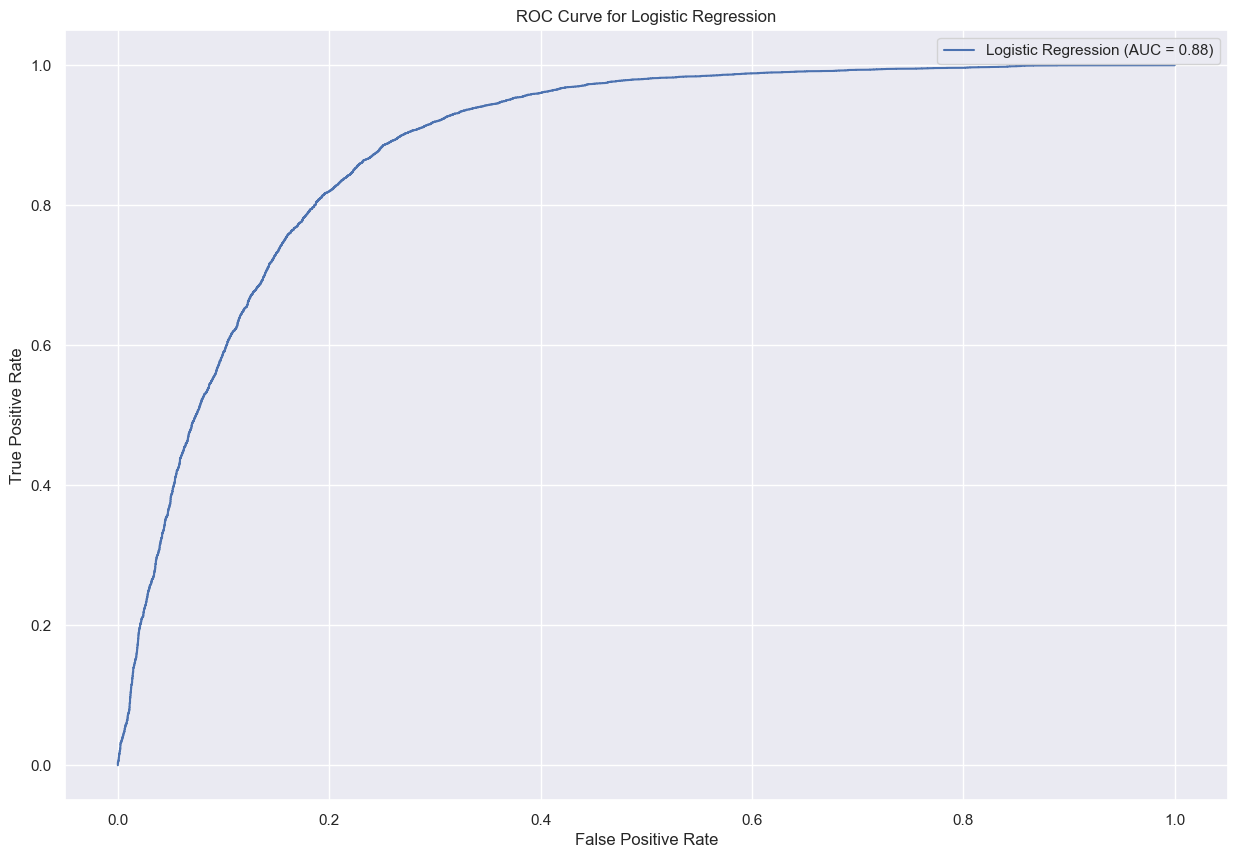

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, cohen_kappa_score
import matplotlib.pyplot as plt

# 5. Model Training and Evaluation
def evaluate_logistic_regression(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report
    print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        #'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 6. Define a function to plot ROC curve for Logistic Regression
def plot_roc_curve_logistic_regression(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')
    plt.legend()
    plt.show()

# 7. Initialize Logistic Regression and evaluate
logistic_regression = LogisticRegression(random_state=42)  # You can adjust parameters as needed
metrics = evaluate_logistic_regression(logistic_regression, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 8. Plot the ROC curve
plot_roc_curve_logistic_regression(logistic_regression, X_test_resampled, y_test_resampled)


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      7978
           1       0.92      0.92      0.92      7978

    accuracy                           0.92     15956
   macro avg       0.92      0.92      0.92     15956
weighted avg       0.92      0.92      0.92     15956

Confusion Matrix:
 [[7321  657]
 [ 623 7355]]
Train Accuracy: 0.9112061671523926
Test Accuracy: 0.919779393331662
Precision: 0.9179980029955067
Recall: 0.9219102531962898
F1 Score: 0.9199499687304565
Confusion Matrix: [[7321  657]
 [ 623 7355]]
Cohen's Kappa Score: 0.8395587866633242


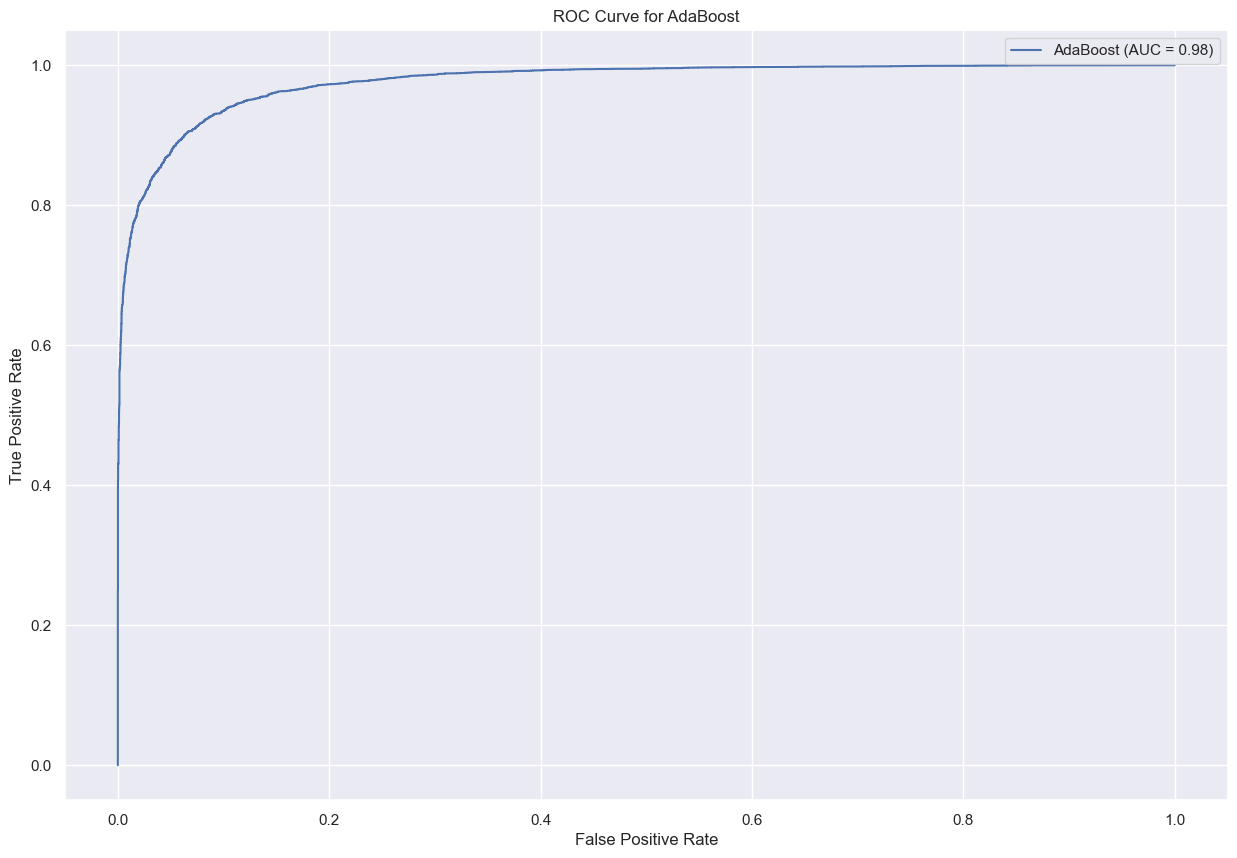

In [70]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc)
from sklearn.utils.class_weight import compute_sample_weight
#import matplotlib.pyplot as plt

# 1. Model Training and Evaluation for AdaBoost
def evaluate_adaboost(model, X_train, X_test, y_train, y_test):
    # Compute class weights to handle class imbalance
    class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Train the AdaBoost model with sample weights
    model.fit(X_train, y_train, sample_weight=class_weights)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report for the test set
    print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 2. Define a function to plot ROC curve for AdaBoost
def plot_roc_curve_adaboost(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for AdaBoost')
    plt.legend()
    plt.show()

# 3. Initialize AdaBoostClassifier and evaluate
adb_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
metrics = evaluate_adaboost(adb_classifier, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 4. Plot the ROC curve
plot_roc_curve_adaboost(adb_classifier, X_test_resampled, y_test_resampled)


Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      7978
           1       0.90      0.94      0.92      7978

    accuracy                           0.92     15956
   macro avg       0.92      0.92      0.92     15956
weighted avg       0.92      0.92      0.92     15956

Confusion Matrix:
 [[7134  844]
 [ 462 7516]]
Train Accuracy: 0.9178183071668077
Test Accuracy: 0.9181499122587115
Precision: 0.899043062200957
Recall: 0.9420907495612936
F1 Score: 0.9200636552821643
Confusion Matrix: [[7134  844]
 [ 462 7516]]
Cohen's Kappa Score: 0.8362998245174229


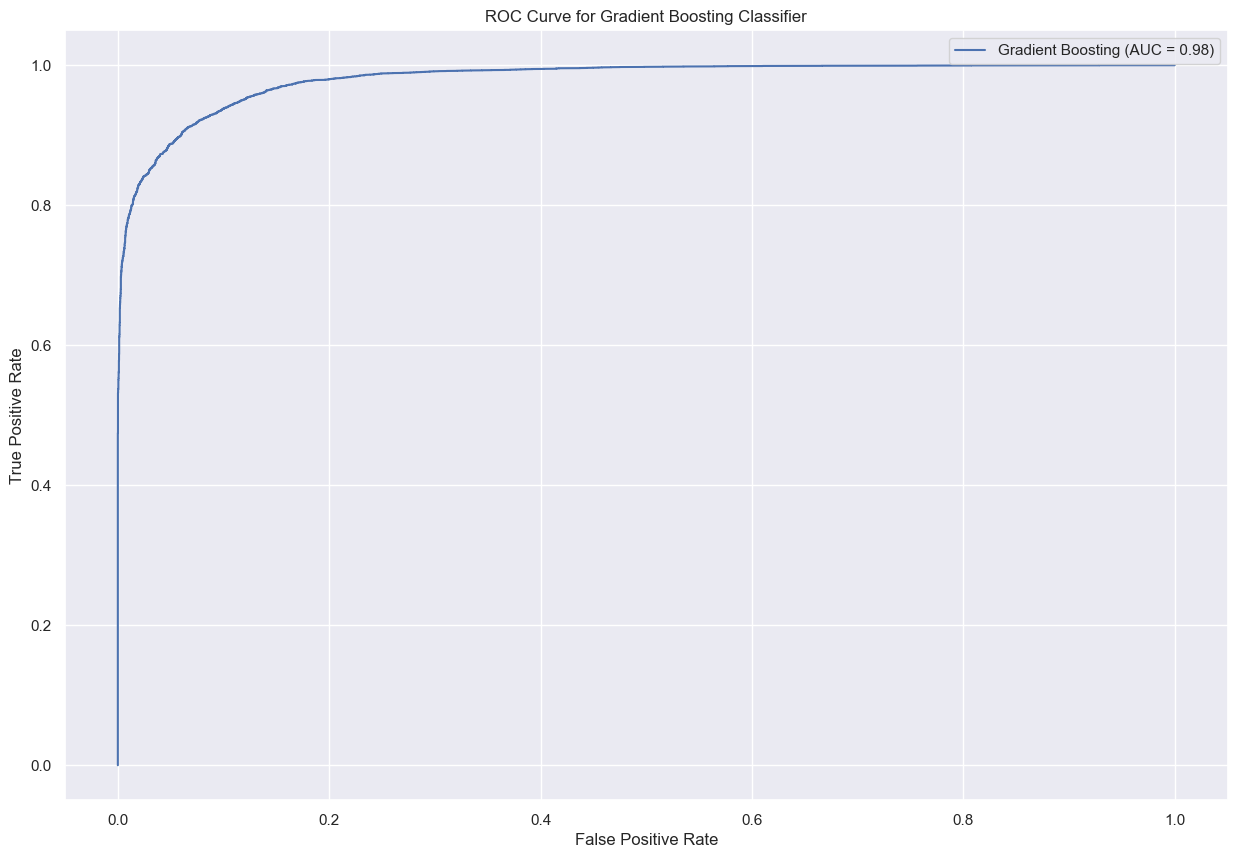

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Model Training and Evaluation for Gradient Boosting Classifier
def evaluate_gbm(model, X_train, X_test, y_train, y_test):
    # Train the Gradient Boosting model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report for the test set
    print("Gradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 2. Define a function to plot ROC curve for Gradient Boosting Classifier
def plot_roc_curve_gbm(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Gradient Boosting Classifier')
    plt.legend()
    plt.show()

# 3. Initialize the Gradient Boosting Classifier model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 4. Evaluate Gradient Boosting Classifier
metrics = evaluate_gbm(gbm, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 5. Plot the ROC curve
plot_roc_curve_gbm(gbm, X_test_resampled, y_test_resampled)


Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85      7978
           1       0.93      0.73      0.82      7978

    accuracy                           0.84     15956
   macro avg       0.86      0.84      0.84     15956
weighted avg       0.86      0.84      0.84     15956

Confusion Matrix:
 [[7555  423]
 [2142 5836]]
Train Accuracy: 0.9994515997618376
Test Accuracy: 0.8392454249185259
Precision: 0.9324173190605528
Recall: 0.7315116570569065
F1 Score: 0.8198356395308001
Cohen's Kappa Score: 0.6784908498370519


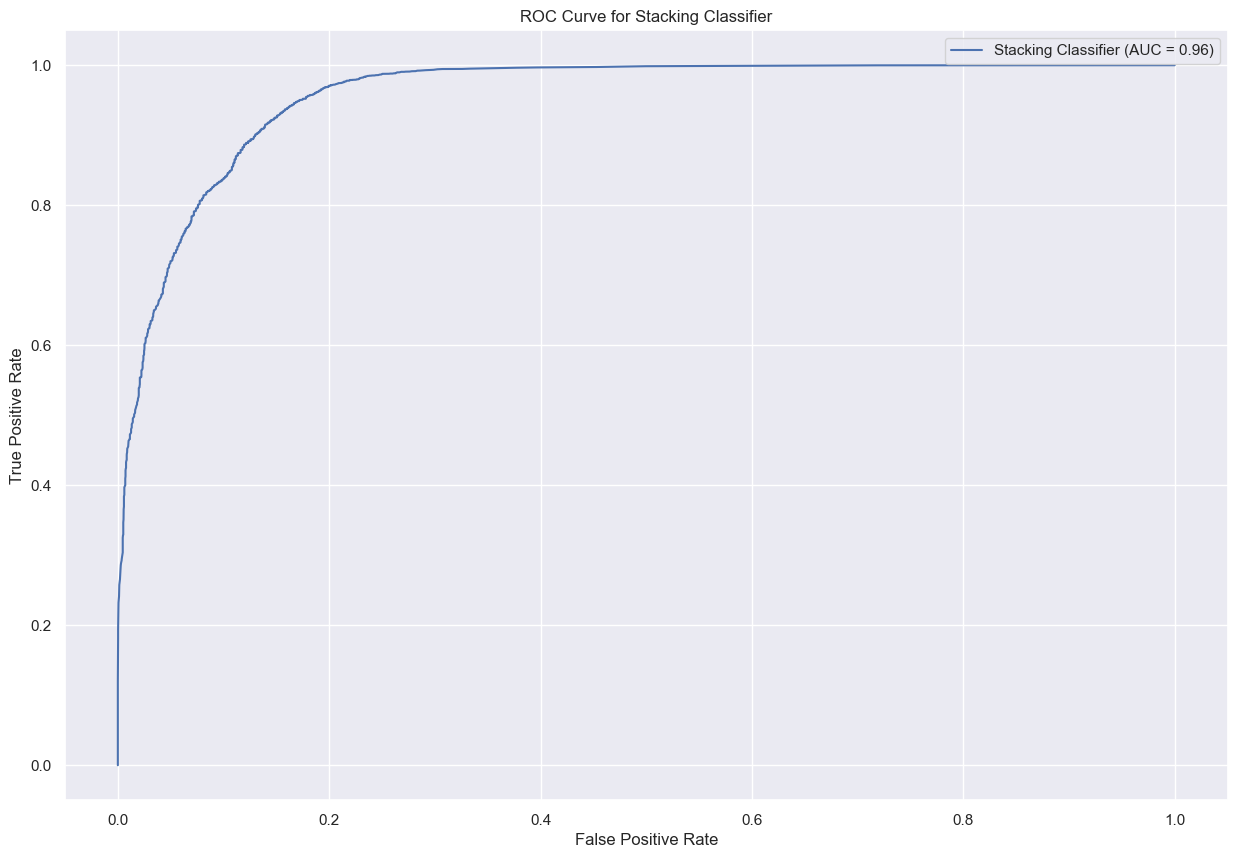

In [72]:
from sklearn.ensemble import StackingClassifier

# 1. Model Training and Evaluation for Stacking Classifier
def evaluate_stacking(model, X_train, X_test, y_train, y_test):
    # Train the Stacking Classifier model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report for the test set
    print("Stacking Classifier Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        #'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 2. Define a function to plot ROC curve for Stacking Classifier
def plot_roc_curve_stacking(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Stacking Classifier (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Stacking Classifier')
    plt.legend()
    plt.show()

# 3. Initialize base models for the Stacking Classifier
dtc = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=42)

# 4. Initialize the meta-model (final estimator)
meta_model = LogisticRegression(random_state=42)

# 5. Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', dtc),
        ('knn', knn),
        ('random_forest', rfc),

    ],
    final_estimator=meta_model,
    cv=5  # Optional: cross-validation folds
)

# 6. Evaluate Stacking Classifier
metrics = evaluate_stacking(stacking_clf, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 7. Plot the ROC curve
plot_roc_curve_stacking(stacking_clf, X_test_resampled, y_test_resampled)


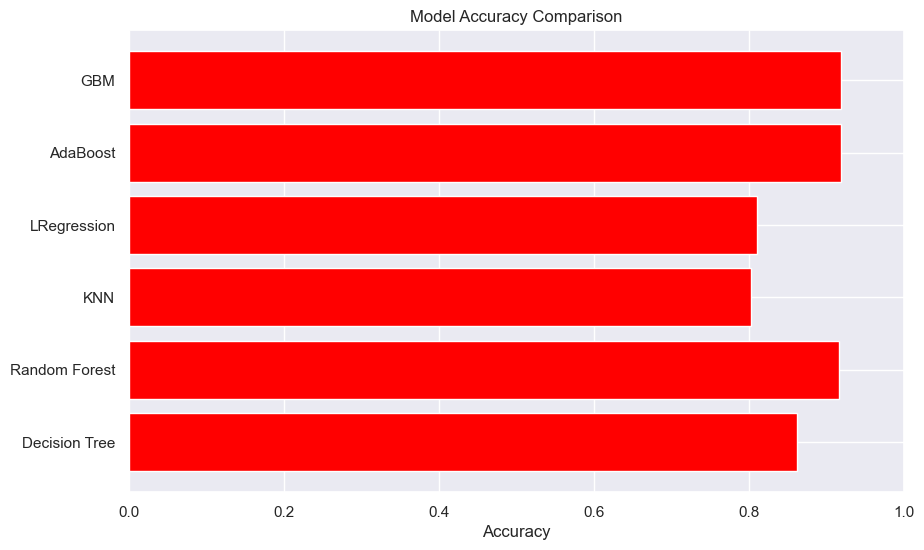

In [57]:
# Import necessary libraries

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'LRegression':LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Fit each model and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    accuracy = accuracy_score(y_test_resampled, y_pred)
    accuracy_results[model_name] = accuracy

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='red')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()


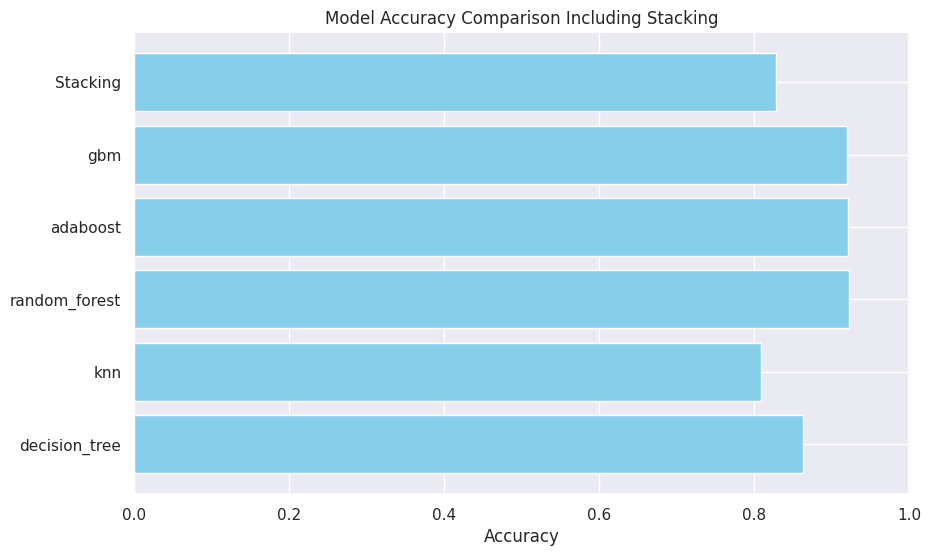

In [ ]:
# Import necessary libraries


# Initialize the models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Create a stacking classifier with a Logistic Regression meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Initialize a dictionary to store accuracy results
accuracy_results = {}

# Fit and evaluate base models
for name, model in base_models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    accuracy = accuracy_score(y_test_resampled, y_pred)
    accuracy_results[name] = accuracy

# Fit and evaluate the stacking model
stacking_model.fit(X_train_resampled, y_train_resampled)
y_pred_stacking = stacking_model.predict(X_test_resampled)
accuracy_results['Stacking'] = accuracy_score(y_test_resampled, y_pred_stacking)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison Including Stacking')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'subsample': [0.8, 1.0]  # Subsample ratio of the training instances
}

# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=2,
                           scoring='accuracy')  # Metric to optimize

# Fit the model with GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


In [ ]:
# Use the best estimator found by GridSearchCV for evaluation
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on test data
metrics = evaluate_random_forest(best_rf_model, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# Plot the ROC curve for the best model
plot_roc_curve_random_forest(best_rf_model, X_test_resampled, y_test_resampled)

In [74]:
#cross validation
from sklearn.model_selection import cross_val_score
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
cv_scores = cross_val_score(gbm,X_train_resampled,y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.81989816 0.92980807 0.93027264 0.9301943  0.93035099]
Mean CV Score: 0.9081048306764655


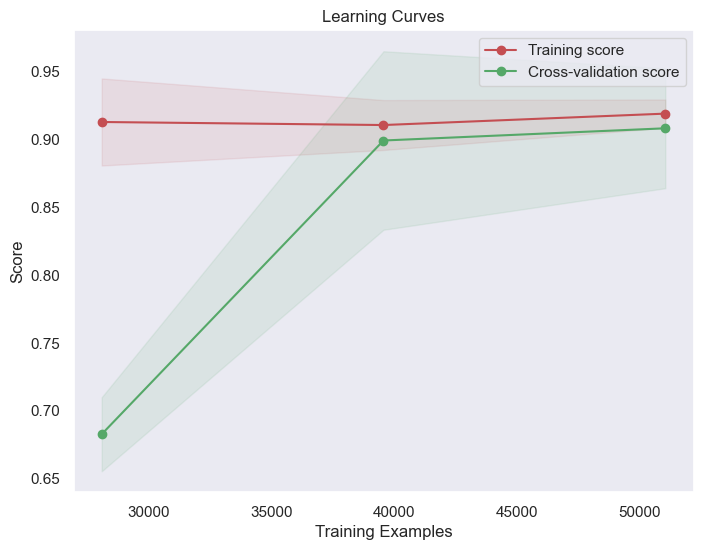

In [75]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbm, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)


# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [76]:
#cross validation
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(random_forest,X_train_resampled,y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.85186056 0.96318057 0.96286431 0.9604356  0.9604356 ]
Mean CV Score: 0.9397553268391088


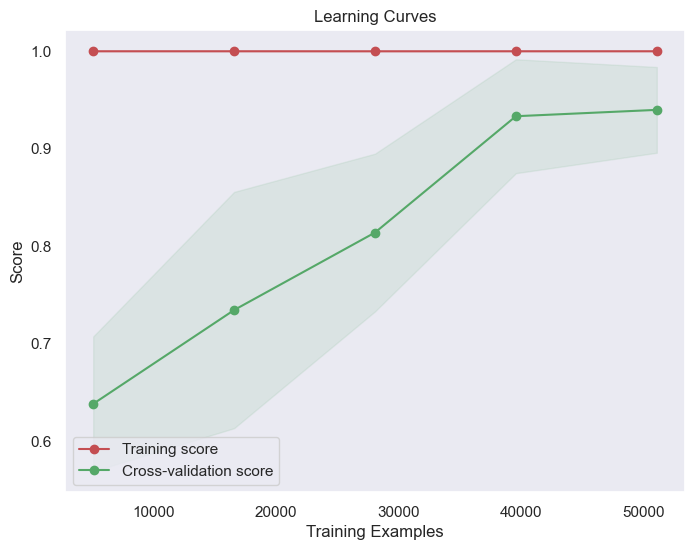

In [77]:

# Initialize RandomForest model
random_forest = RandomForestClassifier(random_state=42)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [78]:
#cross validation
from sklearn.model_selection import cross_val_score
adb_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(adb_classifier,X_train_resampled,y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.79459459 0.93004309 0.92776559 0.92854904 0.93183955]
Mean CV Score: 0.9025583729601825


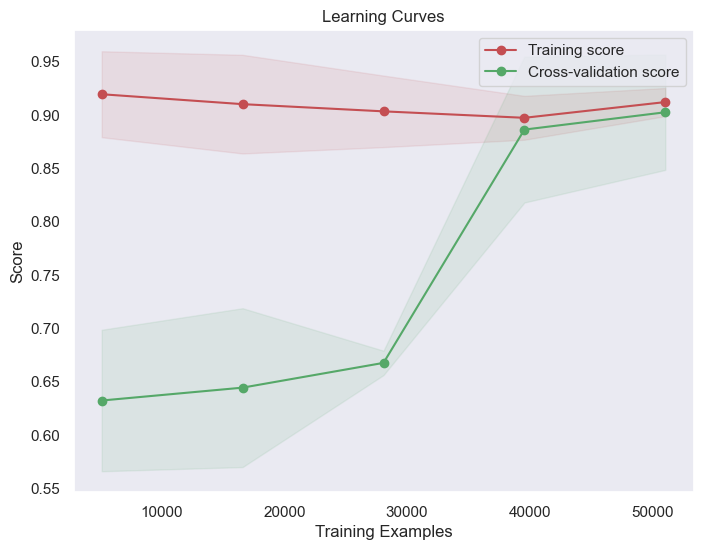

In [80]:

# Initialize Gradient Boosting model
adb_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    adb_classifier, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
import numpy as np

# Step 1: Define the new test case (replace these values with your input)
# Make sure the feature values match the order and structure of your training data (X_train_resampled)
new_test_case = np.array([[]])  # Example input (size = 1 row, 49 columns)

# Step 2: Use the trained model to predict the output for the new test case
output = gbm.predict(new_test_case)

# Step 3: Print the prediction
print(f"Predicted output for the test case: {output[0]}")


CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7978
           1       0.95      0.94      0.94      7978

    accuracy                           0.94     15956
   macro avg       0.94      0.94      0.94     15956
weighted avg       0.94      0.94      0.94     15956

Confusion Matrix:
 [[7562  416]
 [ 513 7465]]
Train Accuracy: 0.9501582526401554
Test Accuracy: 0.9417773878164953
Precision: 0.9472148204542571
Recall: 0.9356981699674104
F1 Score: 0.9414212749858125
Confusion Matrix: [[7562  416]
 [ 513 7465]]
Cohen's Kappa Score: 0.8835547756329907


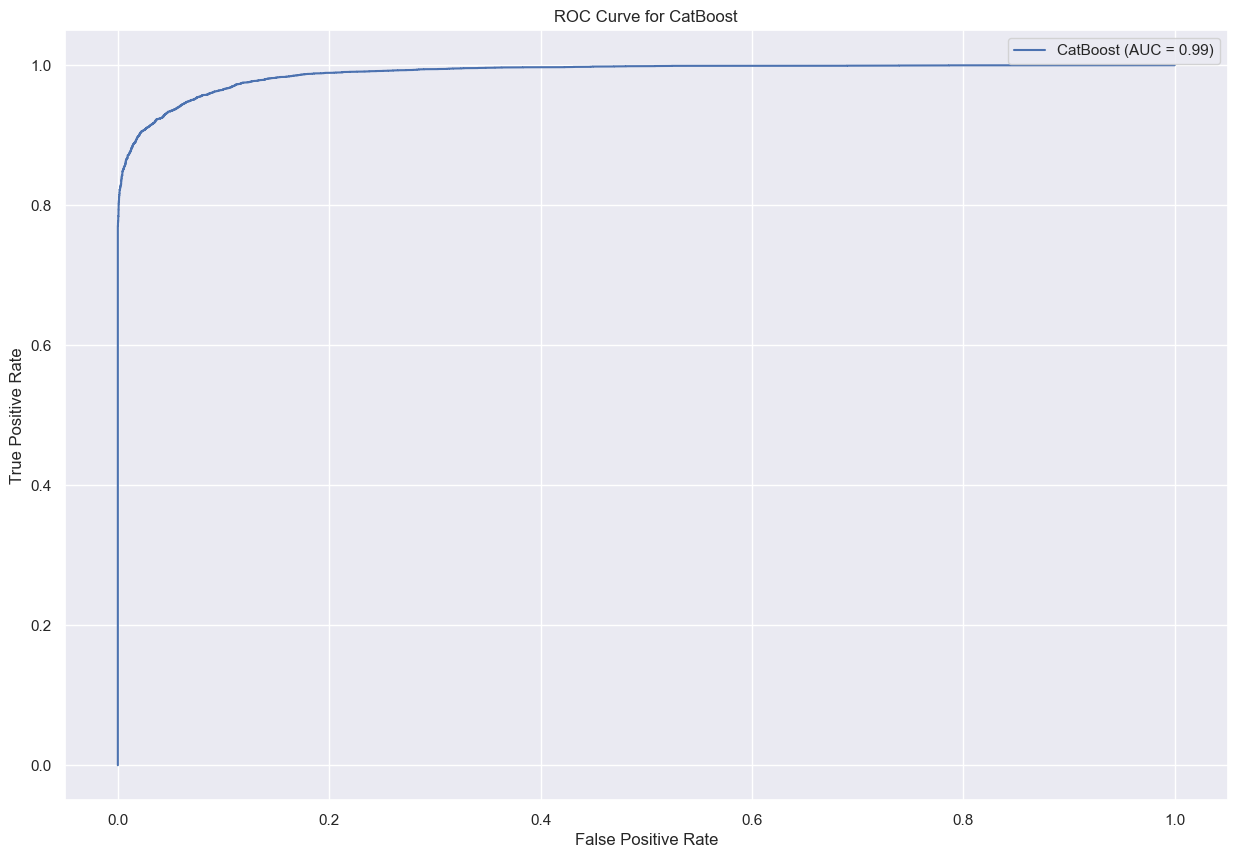

In [55]:


from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Model Training and Evaluation for CatBoost
def evaluate_catboost(model, X_train, X_test, y_train, y_test):
    # Compute class weights to handle class imbalance
    class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Train the CatBoost model with sample weights
    model.fit(X_train, y_train, sample_weight=class_weights, verbose=False)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report for the test set
    print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 2. Define a function to plot ROC curve for CatBoost
def plot_roc_curve_catboost(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'CatBoost (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CatBoost')
    plt.legend()
    plt.show()

# 3. Initialize CatBoostClassifier and evaluate
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
metrics = evaluate_catboost(catboost_classifier, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 4. Plot the ROC curve
plot_roc_curve_catboost(catboost_classifier, X_test_resampled, y_test_resampled)


In [56]:
#cross validation
from sklearn.model_selection import cross_val_score
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
cv_scores = cross_val_score(catboost_classifier,X_train_resampled,y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.7052879  0.96474736 0.96317769 0.96192416 0.96419618]
Mean CV Score: 0.9118666556682443


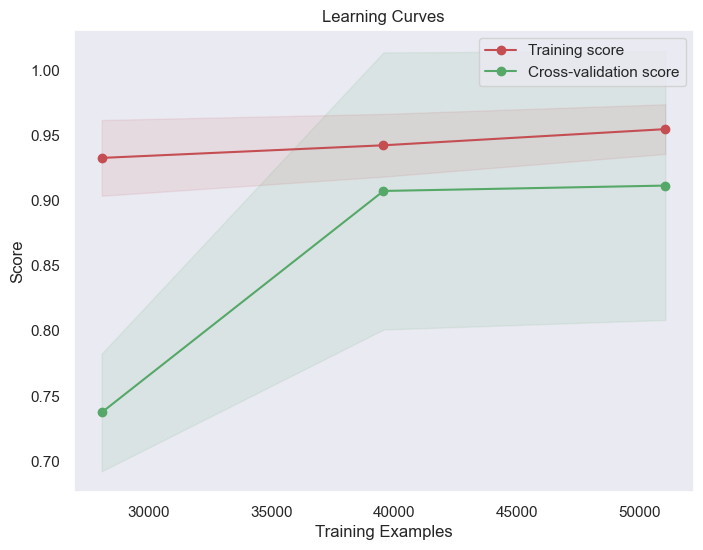

In [73]:
from sklearn.model_selection import learning_curve

# Initialize Gradient Boosting model
catboost_classifier = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    catboost_classifier, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


[LightGBM] [Info] Number of positive: 31911, number of negative: 31911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 63822, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7978
           1       0.94      0.94      0.94      7978

    accuracy                           0.94     15956
   macro avg       0.94      0.94      0.94     15956
weighted avg       0.94      0.94      0.94     15956

Confusion Matrix:
 [[7479  499]
 [ 455 7523]]
Train Accuracy: 0.9485913948168343
Test Accuracy: 0.9402105790925044
Precision: 0.937796060

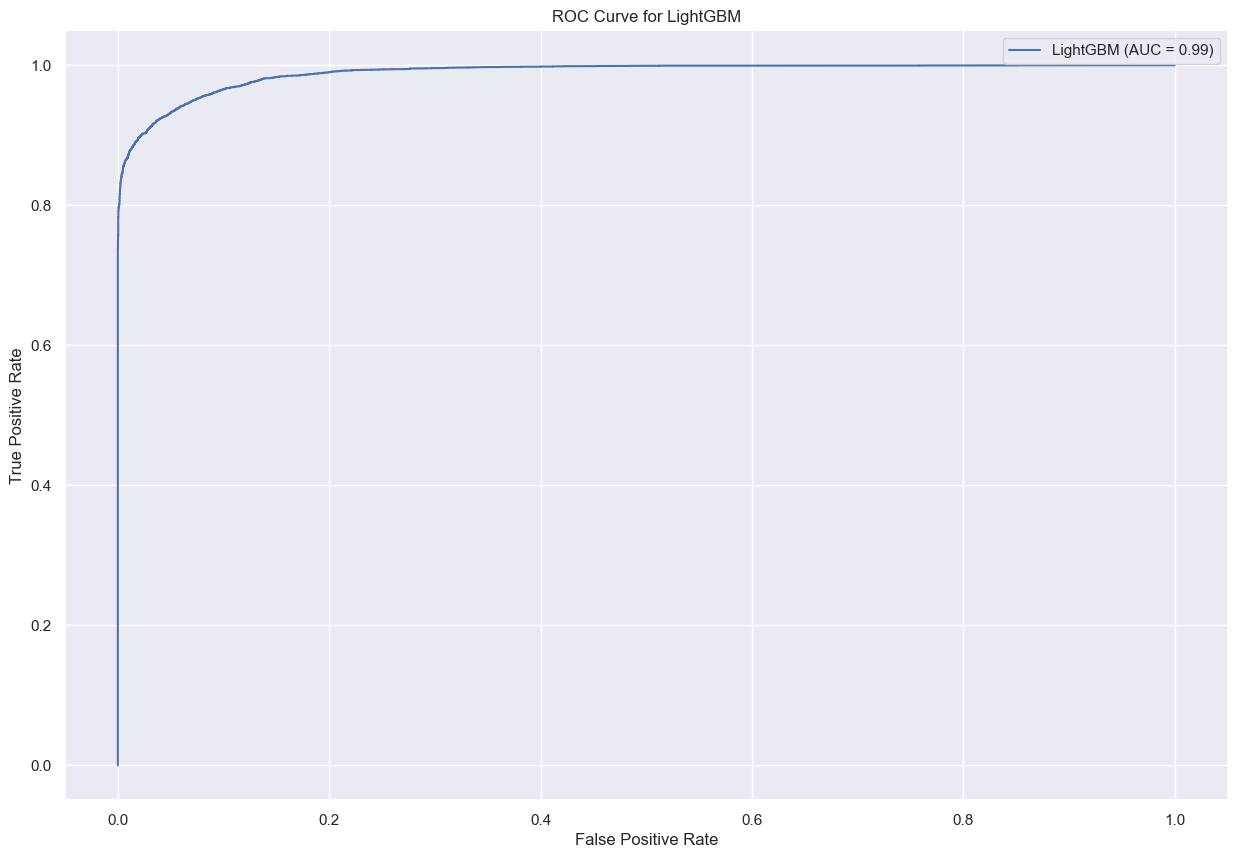

In [61]:
import lightgbm as lgb
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Model Training and Evaluation for LightGBM
def evaluate_lightgbm(model, X_train, X_test, y_train, y_test):
    # Compute class weights to handle class imbalance
    class_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Train the LightGBM model with sample weights
    model.fit(X_train, y_train, sample_weight=class_weights)

    # Make predictions on train and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Print classification report for the test set
    print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_test))

    # Print confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

    # Calculate and display evaluation metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_test)
    }

    # Print the evaluation metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

    # Calculate Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred_test)
    print(f"Cohen's Kappa Score: {kappa}")

    return metrics

# 2. Define a function to plot ROC curve for LightGBM
def plot_roc_curve_lightgbm(model, X_test, y_test):
    # Predict probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for LightGBM')
    plt.legend()
    plt.show()

# 3. Initialize LGBMClassifier and evaluate
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
metrics = evaluate_lightgbm(lgb_classifier, X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)

# 4. Plot the ROC curve
plot_roc_curve_lightgbm(lgb_classifier, X_test_resampled, y_test_resampled)


In [62]:
#cross validation
from sklearn.model_selection import cross_val_score
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(lgb_classifier,X_train_resampled,y_train_resampled, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


[LightGBM] [Info] Number of positive: 25529, number of negative: 25528
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 51057, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initscore=0.000039
[LightGBM] [Info] Start training from score 0.000039
[LightGBM] [Info] Number of positive: 25528, number of negative: 25529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3390
[LightGBM] [Info] Number of data points in the train set: 51057, number of used features: 14
[LightGBM] [Info] [b

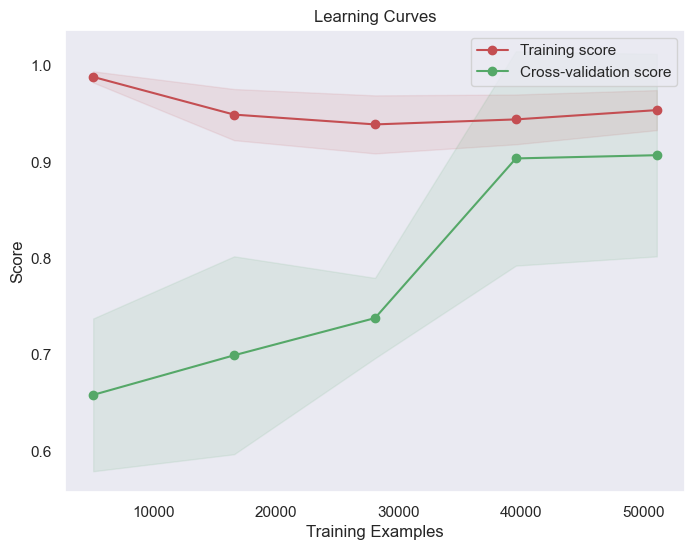

In [63]:
from sklearn.model_selection import learning_curve

# Initialize Gradient Boosting model
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lgb_classifier, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


[LightGBM] [Info] Number of positive: 31911, number of negative: 31911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 63822, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


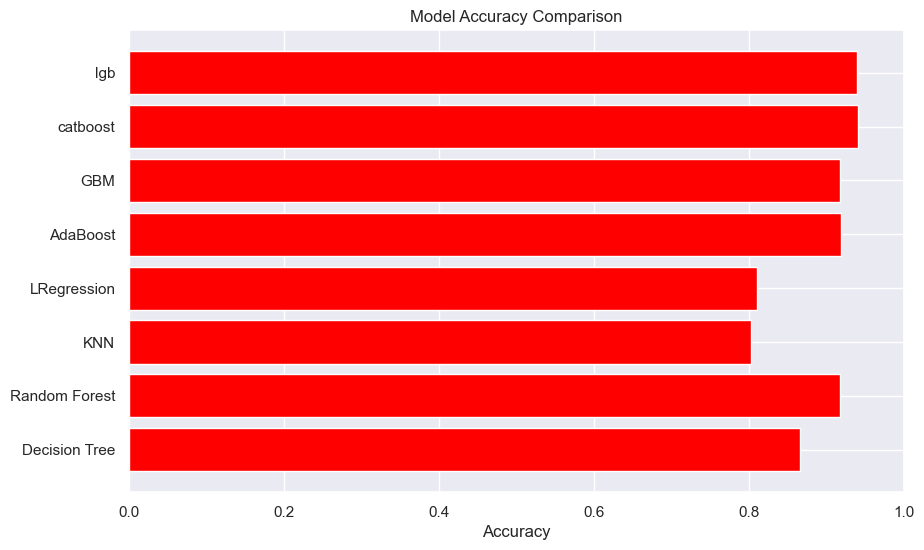

In [82]:
# Import necessary libraries

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'LRegression':LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'catboost': CatBoostClassifier(iterations=100, random_state=42, verbose=False),
    'lgb':lgb.LGBMClassifier(n_estimators=100, random_state=42)

}

# Fit each model and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    accuracy = accuracy_score(y_test_resampled, y_pred)
    accuracy_results[model_name] = accuracy

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='red')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.show()


In [ ]:
print(type(y_train), y_train.shape)


<class 'pandas.core.series.Series'> (31624,)


In [59]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 375.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.4 MB 530.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 530.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 530.7 kB/s eta 0:00:03
   ----- ----------------------

In [ ]:
print(y_train.isnull().sum())  # If y_train is a pandas Series


0
